In [1]:
import pandas as pd
from simplet5 import SimpleT5

Global seed set to 42


In [2]:
train_df = pd.read_csv('01train_set.csv', delimiter='|')
train_df['source_text'] = 'classify soap: ' + train_df['source_text']
train_df.dropna(inplace=True)
train_df

,source_text,target_text
0,classify soap: HISTORY OF PRESENT ILLNESS: T...,subjective
1,classify soap: The patient is a 68-year-old fe...,subjective
2,classify soap: Liver function tests:\n- ALT: 8...,objective
3,classify soap: Begin enoxaparin prophylaxis.,assessment_plan
4,"classify soap: No stomachache, vomiting or dia...",assessment_plan
...,...,...
3950,classify soap: He also admitted to have dark a...,objective
3951,classify soap: #Pancreatitis - Patient present...,assessment_plan
3952,"classify soap: ECG: sinus rhythm, rate 78bpm, ...",objective
3953,classify soap: GENERAL: The patient was sleepy...,objective


In [3]:
val_df = pd.read_csv('02val_set.csv', delimiter='|')
val_df['source_text'] = 'classify soap: ' + val_df['source_text']
val_df.dropna(inplace=True)
val_df

,source_text,target_text
0,"classify soap: HE DENIES SHRIMP, SEA FOOD OR D...",objective
1,classify soap: Weight was 132.6 about a week a...,objective
2,classify soap: B12 deficiency.5. Osteoporosis....,assessment_plan
3,classify soap: The patient has a normal blood ...,objective
4,classify soap: The patient was prescribed amox...,assessment_plan
...,...,...
208,classify soap: Bowel sounds present. Nontender...,objective
209,classify soap: Patient admits past surgical hi...,subjective
210,classify soap: Testes are bilaterally descende...,objective
211,classify soap: I told the patient he could use...,assessment_plan


In [19]:
"""model = SimpleT5()
model.from_pretrained(model_type="t5", model_name="razent/SciFive-large-Pubmed_PMC-MedNLI")
model.train(train_df=train_df,
            eval_df=val_df,
            batch_size=1,
            max_epochs=20,
            use_gpu=True,
            dataloader_num_workers=2
           )"""

'model = SimpleT5()\nmodel.from_pretrained(model_type="t5", model_name="razent/SciFive-large-Pubmed_PMC-MedNLI")\nmodel.train(train_df=train_df,\n            eval_df=val_df,\n            batch_size=1,\n            max_epochs=20,\n            use_gpu=True,\n            dataloader_num_workers=2\n           )'

In [4]:
test_df = pd.read_csv('03test_set.csv', delimiter='|')
test_df['source_text'] = 'classify soap: ' + test_df['source_text']
test_df

,source_text,target_text
0,classify soap: Another option will be to use l...,assessment_plan
1,classify soap: She denies diarrhea. She does c...,subjective
2,classify soap: No drug allergies. SOCIAL: Onl...,subjective
3,classify soap: Patient is a 26 year old male w...,subjective
4,"classify soap: IMPRESSION:,1. Pulmonary disord...",assessment_plan
...,...,...
80,classify soap: Testing of cranial nerves revea...,subjective
81,classify soap: Reports she has been not social...,subjective
82,classify soap: PHYSICAL EXAMINATION: He is ale...,objective
83,"classify soap: CHIEF COMPLAINT: """"A lot has ...",subjective


In [7]:
model = SimpleT5()
model.load_model("t5","outputs/simplet5-epoch-6-train-loss-0.0069-val-loss-0.0122")


In [8]:
model.predict('classify soap: The patient was given a prescription for 10 mg of lisinopril daily.')

['assessment_plan']

In [23]:
predictions = []
gold_labels = []
for i in test_df.iterrows():
    pred = model.predict(i[1]['source_text'])[0].strip()
    gold = i[1]['target_text'].strip()

    predictions.append(pred)
    gold_labels.append(gold)

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(gold_labels, predictions)
cm_df = pd.DataFrame(cm,
                     index = ['subjective','objective','assessment_plan'],
                     columns = ['subjective','objective','assessment_plan'])

cm_df

,subjective,objective,assessment_plan
subjective,17,0,0
objective,0,33,0
assessment_plan,0,0,35


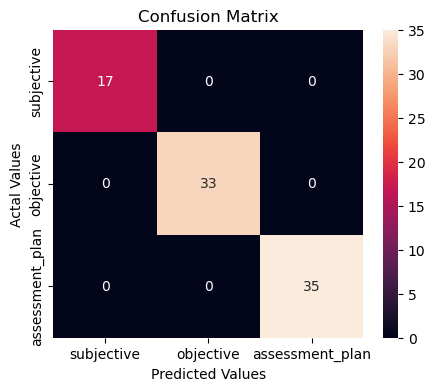

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [10]:
model.predict("classify soap: Jill denied any suicidal ideation in the past week. She reported that she still feels sad most of the time. She got an “F” on another math test this week.")

['subjective']

In [11]:
model.predict("classify soap: While client’s endorsed symptoms and presentation are in keeping with depression, but are part of a sudden change prompted by an argument and reduction in sleep, it is likely that client’s emotional reaction to the argument with his partner and subsequent poor sleep hygiene are responsible for this sudden shift in mood and appearance. Client does not appear to be at risk of suicide at this time, discussing the importance of being available for his younger brother and pet dog, and is agreeable to following the steps outlined in his safety plan if symptoms increase or ideation occurs. However, the client is at risk for worsening depression if he is unable to prevent further decompensation. ")

['assessment_plan']

In [12]:
model.predict("classify soap: Client has committed to resuming a sleep schedule, beginning tonight, and agreed to turn off his smartphone an hour before the established 11PM bedtime. Client will monitor his symptoms, and reach out to this writer if symptoms increase")

['assessment_plan']

In [13]:
model.predict(' Client appeared disheveled, which is unusual for him, and a marked change since last session. Client sat in a hunched position upon the beginning of the session, and appeared tired, with slowed movements and dysthymic mood. He was attentive and cooperative, and had congruent and appropriate affect.')

['subjective']